<a href="https://colab.research.google.com/github/joseluisfalla/DSPS_JFalla/blob/main/HW4/MCMC_JFalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

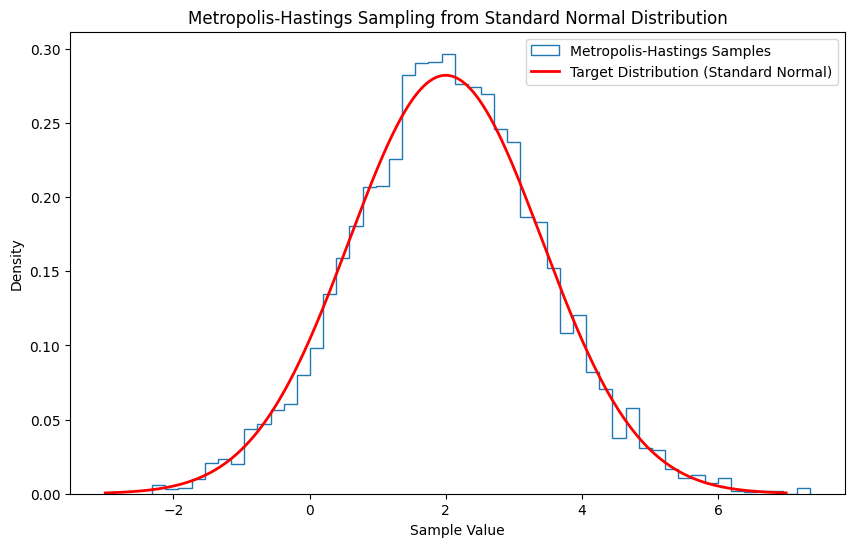

In [21]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

def target_distribution(x):
    return st.norm.pdf(x, loc=2, scale=np.sqrt(2))

def proposal_distribution(x, step_size):
    return np.random.normal(x, step_size)

def metropolis_hastings(iterations, step_size):
    samples = []
    current_sample = np.random.randn()

    for _ in range(iterations):

        proposed_sample = proposal_distribution(current_sample, step_size)

        acceptance_ratio = min(1, target_distribution(proposed_sample) / target_distribution(current_sample))

        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

iterations = 10000
step_size = 1

samples = metropolis_hastings(iterations, step_size)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, label='Metropolis-Hastings Samples', histtype='step')
x = np.linspace(-3, 7, 1000)
plt.plot(x, target_distribution(x), color='red', linewidth=2, label='Target Distribution (Standard Normal)')
plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.legend()
plt.title('Metropolis-Hastings Sampling from Standard Normal Distribution')
plt.show()